# Regression

In [5]:
import pandas as pd
import numpy as np
import os
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.3f' % x)


df = pd.read_csv(os.getcwd() + "\\data\\2008_small.csv",index_col = 0)

Construiremos una regresión simple con dos variables que claramente están relacionadas

In [2]:
df = df.dropna(subset = ["ArrDelay"]) # Elimiar NAs basándose en columnas de interés
df = df.sample(n = 100000)
df = df.drop(columns = ["Year", "Cancelled", "Diverted"])
Y = df["ArrDelay"]
X = df[["DepDelay"]]

In [92]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1000742,2008,2,12,2,1937.000,1940,2220.000,2120,MQ,4745,...,16.000,78.000,0,NaN,0,0.000,0.000,60.000,0.000,0.000
3014085,2008,6,8,7,1802.000,1745,1924.000,1910,WN,450,...,7.000,9.000,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4122484,2008,7,23,3,900.000,900,947.000,955,AA,1241,...,7.000,11.000,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3855808,2008,7,31,4,1030.000,1034,1244.000,1246,UA,751,...,8.000,27.000,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5565463,2008,10,27,1,1618.000,1623,1839.000,1848,OO,5962,...,5.000,12.000,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [45]:
df.isna().sum()

Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   0
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
CancellationCode     100000
CarrierDelay          77715
WeatherDelay          77715
NASDelay              77715
SecurityDelay         77715
LateAircraftDelay     77715
dtype: int64

In [46]:
df.corr()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Month,1.000,0.003,-0.001,-0.006,-0.005,0.000,0.002,0.005,-0.018,-0.010,...,-0.039,-0.026,-0.008,0.009,-0.021,-0.003,0.002,0.012,-0.001,0.007
DayofMonth,0.003,1.000,0.007,0.000,0.000,-0.000,-0.001,0.003,0.005,0.006,...,0.004,0.005,0.006,-0.007,0.004,0.012,0.007,-0.004,0.004,-0.001
DayOfWeek,-0.001,0.007,1.000,0.000,0.001,-0.004,-0.001,0.001,0.013,0.015,...,0.002,0.007,0.017,0.006,-0.006,0.011,-0.004,-0.023,0.011,0.001
DepTime,-0.006,0.000,0.000,1.000,0.968,0.713,0.789,-0.004,-0.018,-0.014,...,0.169,0.192,-0.016,-0.049,0.049,-0.006,0.025,-0.015,-0.012,0.196
CRSDepTime,-0.005,0.000,0.001,0.968,1.000,0.697,0.788,-0.010,-0.017,-0.011,...,0.110,0.132,-0.011,-0.052,0.039,-0.056,0.017,-0.051,-0.014,0.178
ArrTime,0.000,-0.000,-0.004,0.713,0.697,1.000,0.863,-0.016,0.035,0.036,...,0.061,0.068,0.027,-0.000,0.052,-0.068,-0.024,0.015,0.000,-0.002
CRSArrTime,0.002,-0.001,-0.001,0.789,0.788,0.863,1.000,-0.027,0.047,0.053,...,0.108,0.128,0.042,-0.014,0.059,-0.052,0.019,-0.015,-0.011,0.143
FlightNum,0.005,0.003,0.001,-0.004,-0.010,-0.016,-0.027,1.000,-0.321,-0.330,...,0.020,0.011,-0.352,-0.010,0.022,0.061,0.055,0.009,-0.009,-0.035
ActualElapsedTime,-0.018,0.005,0.013,-0.018,-0.017,0.035,0.047,-0.321,1.000,0.980,...,0.090,0.042,0.965,0.163,0.265,-0.041,-0.013,0.187,0.010,-0.081
CRSElapsedTime,-0.010,0.006,0.015,-0.014,-0.011,0.036,0.053,-0.330,0.980,1.000,...,0.011,0.033,0.983,0.109,0.141,-0.005,-0.021,0.046,0.009,-0.035


In [47]:
df.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'CancellationCode', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [1]:
df.head().style.background_gradient(cmap='coolwarm')

NameError: name 'df' is not defined

In [49]:
df.corr().style.background_gradient(cmap='coolwarm')

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Month,1.000000,0.003046,-0.001328,-0.006095,-0.004606,0.000101,0.002060,0.005003,-0.017736,-0.009695,-0.015654,-0.038552,-0.026054,-0.007638,0.008671,-0.020626,-0.002554,0.001672,0.012403,-0.001155,0.007244
DayofMonth,0.003046,1.000000,0.007156,0.000380,0.000051,-0.000409,-0.001337,0.002837,0.005076,0.005574,0.005047,0.003808,0.005028,0.005612,-0.006829,0.004405,0.011783,0.006512,-0.003936,0.003930,-0.001181
DayOfWeek,-0.001328,0.007156,1.000000,0.000097,0.000909,-0.004194,-0.001481,0.001025,0.012808,0.015077,0.013884,0.002369,0.006769,0.016583,0.006092,-0.006033,0.010813,-0.003841,-0.022523,0.011045,0.000933
DepTime,-0.006095,0.000380,0.000097,1.000000,0.968044,0.713075,0.789282,-0.004412,-0.017585,-0.013898,-0.022943,0.169011,0.191678,-0.015512,-0.048507,0.049214,-0.006163,0.025002,-0.015419,-0.011569,0.195861
CRSDepTime,-0.004606,0.000051,0.000909,0.968044,1.000000,0.697036,0.788410,-0.010416,-0.017113,-0.011495,-0.020432,0.110428,0.131582,-0.010940,-0.052437,0.038795,-0.055718,0.016922,-0.050778,-0.013980,0.177956
ArrTime,0.000101,-0.000409,-0.004194,0.713075,0.697036,1.000000,0.862849,-0.015931,0.035341,0.036389,0.028166,0.061297,0.068214,0.027038,-0.000053,0.051722,-0.068323,-0.023966,0.014509,0.000134,-0.002397
CRSArrTime,0.002060,-0.001337,-0.001481,0.789282,0.788410,0.862849,1.000000,-0.026882,0.046943,0.052532,0.039988,0.108031,0.127775,0.042478,-0.013801,0.059250,-0.052373,0.019271,-0.014919,-0.010892,0.143137
FlightNum,0.005003,0.002837,0.001025,-0.004412,-0.010416,-0.015931,-0.026882,1.000000,-0.321276,-0.329592,-0.337110,0.019659,0.010950,-0.351676,-0.009982,0.021537,0.060736,0.055037,0.008511,-0.008514,-0.034804
ActualElapsedTime,-0.017736,0.005076,0.012808,-0.017585,-0.017113,0.035341,0.046943,-0.321276,1.000000,0.980157,0.984443,0.090369,0.042130,0.965064,0.163021,0.264755,-0.040688,-0.013353,0.186859,0.009555,-0.080547
CRSElapsedTime,-0.009695,0.005574,0.015077,-0.013898,-0.011495,0.036389,0.052532,-0.329592,0.980157,1.000000,0.988273,0.011105,0.033311,0.983349,0.109307,0.141233,-0.004720,-0.021301,0.046169,0.008892,-0.035082


Ajustamos el modelo general, que no requiere parámetros

In [20]:
regr = linear_model.LinearRegression() # Creas el modelo vacío
regr.fit(X, Y) # Aprende de los datos
Y_pred = regr.predict(X) # Usamos el modelo para generar predicciones 

In [25]:
Y

4451157    31.000
6379180    -4.000
6848418    -5.000
2908734     6.000
2591628    16.000
            ...  
3769595   -10.000
2811232   -27.000
1939848   159.000
4170939   -11.000
4044093    32.000
Name: ArrDelay, Length: 100000, dtype: float64

In [28]:
Y

4451157    31.000
6379180    -4.000
6848418    -5.000
2908734     6.000
2591628    16.000
            ...  
3769595   -10.000
2811232   -27.000
1939848   159.000
4170939   -11.000
4044093    32.000
Name: ArrDelay, Length: 100000, dtype: float64

In [30]:
Y_pred

array([ 36.80957805,   1.14648417, -10.06191677, ..., 160.10198833,
         2.16542971,  29.67695927])

Visualizamos los datos, a la vez que mostramos la recta de regresión (predicciones)

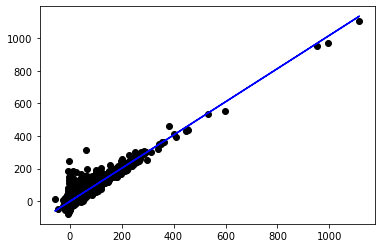

In [43]:
plt.scatter(X[0:10000],Y[0:10000],color = "black")
plt.plot(X[0:10000].values,Y_pred[0:10000],color="Blue")
plt.show()

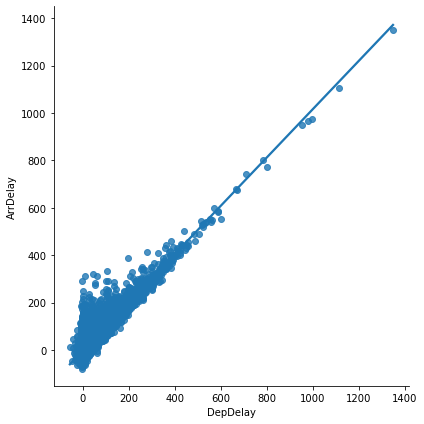

In [33]:
sns.lmplot(x="DepDelay", y="ArrDelay", data = df, height=6)

Mostramos los coeficientes del modelo, y la métrica $R^2$, que indica un porcentaje de relación

In [45]:
print("Pendiente: ",regr.coef_) # Cuanto crece Y, por cada unidad de X
print("Intercept", regr.intercept_) #Punto de corte
print("R cuadrado: ",r2_score(Y, Y_pred)) # % de variabilidad de Y, explicado por X  (Bondad de ajuste)

# Y = Intercept + Pendiente * X

Pendiente:  [1.01894554]
Intercept -1.9103524516852222
R cuadrado:  0.8619068575985829


El 86 % de la variabilidad del retraso de llegada, viene explicado por el retraso de salida

Retraso de llegada = 1.018 * retraso de salida - 1.91 min

In [2]:
retraso salida: 10
retraso llegada: 1.018 * 10 - 1.91

SyntaxError: invalid syntax (43174924.py, line 1)

Flojo < 0.3

Moderado < 0.7

Intenso >= 0.7

In [48]:
df[["ArrDelay", "DepDelay"]].corr().loc["ArrDelay","DepDelay"] ** 2

0.8619068575985964

## Ejercicios

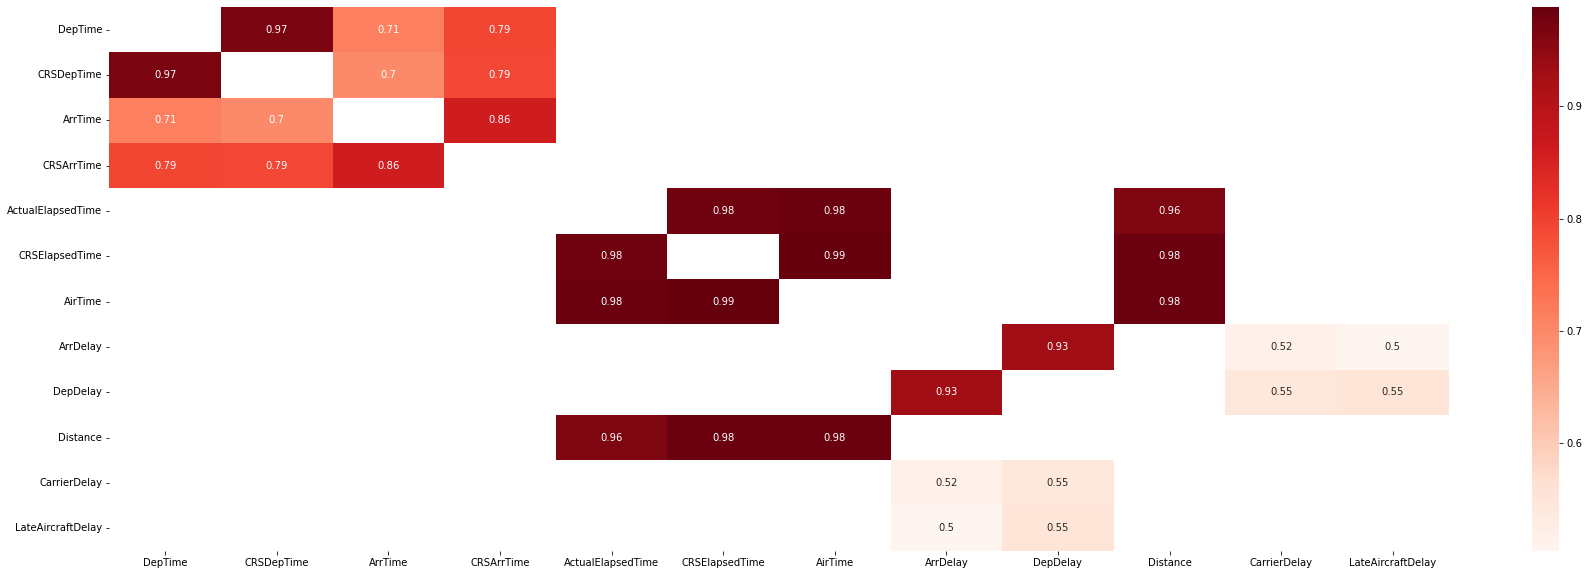

In [101]:
import seaborn as sns
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
filteredDf = filteredDf.dropna(how="all")
filteredDf = filteredDf.T.dropna(how="all")
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

1. Ajusta varios modelos lineales simples entre pares de variables que consideres relacionadas, escribiendo la ecuación correspondiente y mostrando el gráfico

In [53]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,Dest,Distance,TaxiIn,TaxiOut,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3389998,6,24,2,1503.000,1420,1659.000,1625,MQ,3622,N922AE,...,DFW,685,10.000,8.000,NaN,0.000,0.000,0.000,0.000,34.000
3921507,7,22,2,1407.000,1400,2137.000,2136,DL,946,N139DL,...,ATL,1946,13.000,14.000,NaN,NaN,NaN,NaN,NaN,NaN
3995114,7,19,6,819.000,823,853.000,853,HA,124,N487HA,...,HNL,102,5.000,7.000,NaN,NaN,NaN,NaN,NaN,NaN
2986075,5,10,6,2018.000,2022,2057.000,2107,DL,1189,N6715C,...,SMF,532,3.000,16.000,NaN,NaN,NaN,NaN,NaN,NaN
4320348,8,29,5,1805.000,1740,1909.000,1845,WN,520,N622SW,...,LBB,341,2.000,8.000,NaN,10.000,0.000,0.000,0.000,14.000


Pendiente:  [0.11771493]
Intercept 18.23295826397107
R cuadrado:  0.9661334551405821


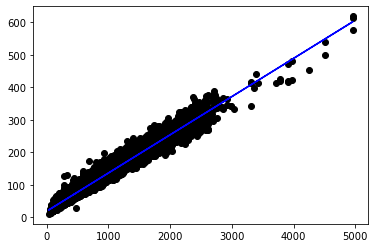

In [117]:
Y = df["AirTime"]
X = df[["Distance"]]

regr = linear_model.LinearRegression()
regr.fit(X, Y) 
Y_pred = regr.predict(X) 

print("Pendiente: ",regr.coef_)
print("Intercept", regr.intercept_) 
print("R cuadrado: ",r2_score(Y, Y_pred)) 

plt.scatter(X[0:10000],Y[0:10000],color = "black")
plt.plot(X[0:10000].values,Y_pred[0:10000],color="Blue")

plt.show()

In [118]:
(Y - Y_pred).mean()

-9.762511600210853e-17

<AxesSubplot:ylabel='Frequency'>

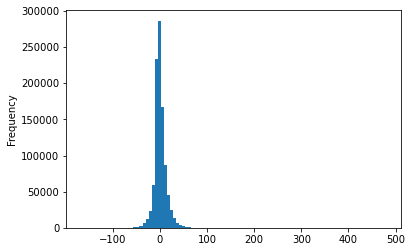

In [119]:
(Y - Y_pred).plot.hist(bins = 100)

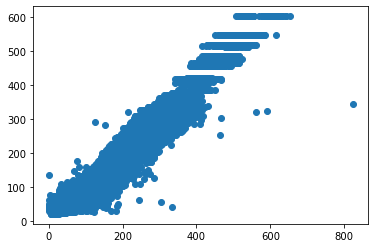

In [120]:
plt.scatter(Y,Y_pred)

In [70]:
df.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'CancellationCode', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

2. Haz una evaluación de los modelos

3. (Difícil!!) Usando bucle(s), cruza todas las variables numéricas entre ellas, y muestra cuáles son los modelos más potentes

In [6]:
df.dtypes

Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
CancellationCode      object
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [39]:
colnum = df.select_dtypes(include = np.number ).columns
results = pd.DataFrame(columns = ['Y', 'X', 'R2'])

for i in range(len(colnum)):
    for j in range(len(colnum)):
        if j > i:
            dfaux = df[[ colnum[i], colnum[j] ]].dropna(how = "any")
            Y = dfaux[colnum[i]]
            X = dfaux[[colnum[j]]]
            regr = linear_model.LinearRegression() 
            regr.fit(X, Y) 
            Y_pred = regr.predict(X) 
            results = results.append({'Y' : colnum[i], 'X' : colnum[j], 'R2' : r2_score(Y, Y_pred)},ignore_index = True)

            print(colnum[i], " vs " , colnum[j], "R2: ",round(r2_score(Y, Y_pred),3)) 

sepal_length  vs  sepal_width R2:  0.014
sepal_length  vs  petal_length R2:  0.76
sepal_length  vs  petal_width R2:  0.669
sepal_width  vs  petal_length R2:  0.184
sepal_width  vs  petal_width R2:  0.134
petal_length  vs  petal_width R2:  0.927


In [33]:
results

,Y,X,R2
0,Month,DayofMonth,0.000
1,Month,DayOfWeek,0.000
2,Month,DepTime,0.000
3,Month,CRSDepTime,0.000
4,Month,ArrTime,0.000
...,...,...,...
205,WeatherDelay,SecurityDelay,0.000
206,WeatherDelay,LateAircraftDelay,0.002
207,NASDelay,SecurityDelay,0.000
208,NASDelay,LateAircraftDelay,0.020


4. Representa gráficamente el error del modelo, cómo lo haríamos?

### Regresión Múltiple

El modelo de regresión realmente potente es el que considera muchas variables simultaneamente, no solamente una

In [133]:
df[["DepDelay","AirTime", "Distance", "TaxiIn", "TaxiOut"]].corr()

,DepDelay,AirTime,Distance,TaxiIn,TaxiOut
DepDelay,1.000,0.027,0.026,0.023,0.102
AirTime,0.027,1.000,0.983,0.086,0.107
Distance,0.026,0.983,1.000,0.078,0.090
TaxiIn,0.023,0.086,0.078,1.000,0.039
TaxiOut,0.102,0.107,0.090,0.039,1.000


In [137]:
Y = df["ArrDelay"]
X = df[["DepDelay","AirTime","TaxiIn","TaxiOut"]]

regr = linear_model.LinearRegression()
regr.fit(X, Y) 
Y_pred = regr.predict(X) 

print("Pendiente: ",regr.coef_) #Cuanto se incrementa Y, por cada incremento de X, MANTENIENDO LAS DEMÁS VARIABLES CONSTANTES
print("Intercept", regr.intercept_) 
print("R cuadrado: ",r2_score(Y, Y_pred)) 

Pendiente:  [ 0.99131254 -0.01315661  0.73017299  0.78383797]
Intercept -18.198387077002103
R cuadrado:  0.9293060100216367


In [154]:
X = df[['AirTime','Distance','TaxiIn','TaxiOut']] 

df["DayOfWeek"] = df["DayOfWeek"].apply(str)

dummies = pd.get_dummies(data=df[['DayOfWeek']]) # Podemos añadirle Origin y Dest
X = pd.concat([X, dummies],axis=1)

In [155]:
X

,AirTime,Distance,TaxiIn,TaxiOut,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
1000742,69.000,431,16.000,78.000,0,1,0,0,0,0,0
3014085,246.000,1848,7.000,9.000,0,0,0,0,0,0,1
4122484,89.000,641,7.000,11.000,0,0,1,0,0,0,0
3855808,219.000,1557,8.000,27.000,0,0,0,1,0,0,0
5565463,64.000,412,5.000,12.000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1516322,63.000,377,14.000,8.000,0,0,0,1,0,0,0
4061877,57.000,312,6.000,24.000,0,0,0,0,1,0,0
5311442,134.000,984,8.000,10.000,0,1,0,0,0,0,0
3949714,75.000,453,5.000,12.000,0,0,0,0,0,1,0


In [156]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print("Coeficientes: ",regr.coef_) # Cuanto crece Y, por cada unidad de X, manteniendo el resto de variables constantes
print("Intercept", regr.intercept_)
Y_pred = regr.predict(X)
print("R cuadrado: ",r2_score(Y, Y_pred))

Coeficientes:  [ 0.36449758 -0.04496002  0.82151632  1.05681172  0.36740912 -0.82496481
 -1.77976092 -0.0167574   2.23274637 -1.4103027   1.43163034]
Intercept -20.005368670219582
R cuadrado:  0.13303034910840073


In [162]:
X = df[['AirTime','Distance','TaxiIn','TaxiOut']] 

df["Month"] = df["Month"].apply(str)
df["DayofMonth"] = df["DayofMonth"].apply(str)
df["DayOfWeek"] = df["DayOfWeek"].apply(str)

dummies = pd.get_dummies(data=df[['Month', 'DayofMonth', 'DayOfWeek']]) # Podemos añadirle Origin y Dest
X = dummies.add(X,fill_value=0)

In [163]:
X

,AirTime,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,DayofMonth_1,DayofMonth_10,...,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,TaxiIn,TaxiOut
507169,77.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7.000,29.000
6366362,218.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7.000,13.000
2373069,274.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,8.000,8.000
5468734,68.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6.000,9.000
419834,66.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,9.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4941236,54.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,5.000,7.000
5698175,83.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6.000,6.000
502591,123.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,17.000
1340304,97.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,10.000


In [11]:
X.columns

Index(['AirTime', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'DayofMonth_1',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_2', 'DayofMonth_20',
       'DayofMonth_21', 'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24',
       'DayofMonth_25', 'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28',
       'DayofMonth_29', 'DayofMonth_3', 'DayofMonth_30', 'DayofMonth_31',
       'DayofMonth_4', 'DayofMonth_5', 'DayofMonth_6', 'DayofMonth_7',
       'DayofMonth_8', 'DayofMonth_9', 'Distance', 'Month_1', 'Month_10',
       'Month_11', 'Month_12', 'Month_2', 'Month_3', 'Month_4', 'Month_5',
       'Month_6', 'Month_7', 'Month_8', 'Month_9', 'TaxiIn', 'TaxiOut'],
      dtype='object')

In [164]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print("Coeficientes: ",regr.coef_) # Cuanto crece Y, por cada unidad de X, manteniendo el resto de variables constantes
print("Intercept", regr.intercept_)
Y_pred = regr.predict(X)
print("R cuadrado: ",r2_score(Y, Y_pred))

Coeficientes:  [ 3.49719146e-01 -1.46362234e+10 -1.46362234e+10 -1.46362234e+10
 -1.46362234e+10 -1.46362234e+10 -1.46362234e+10 -1.46362234e+10
 -1.01803310e+07 -1.01803309e+07 -1.01803327e+07 -1.01803331e+07
 -1.01803317e+07 -1.01803342e+07 -1.01803320e+07 -1.01803326e+07
 -1.01803329e+07 -1.01803334e+07 -1.01803318e+07 -1.01803326e+07
 -1.01803319e+07 -1.01803307e+07 -1.01803295e+07 -1.01803312e+07
 -1.01803336e+07 -1.01803349e+07 -1.01803311e+07 -1.01803305e+07
 -1.01803337e+07 -1.01803350e+07 -1.01803334e+07 -1.01803318e+07
 -1.01803293e+07 -1.01803302e+07 -1.01803341e+07 -1.01803332e+07
 -1.01803326e+07 -1.01803312e+07 -1.01803321e+07 -4.31123569e-02
  5.18172462e+06  5.18171688e+06  5.18171806e+06  5.18173024e+06
  5.18172690e+06  5.18172575e+06  5.18172259e+06  5.18172163e+06
  5.18172769e+06  5.18172559e+06  5.18172233e+06  5.18171749e+06
  8.39401191e-01  1.01341269e+00]
Intercept 14641222036.965094
R cuadrado:  0.14630628591118844


¿Qué pasa cuando añadimos la variable más explicativa...?

In [165]:
X = X.add(df[["DepDelay"]],fill_value=0)

In [168]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

# print("Coeficientes: ",regr.coef_)
Y_pred = regr.predict(X)
print("R cuadrado: ",r2_score(Y, Y_pred))

R cuadrado:  0.9438667646670329


In [171]:
print("Intercept", regr.intercept_)

Intercept -11736662892.040558


In [169]:
print("Coeficientes: ",regr.coef_)

Coeficientes:  [ 3.60898519e-01  1.17599902e+10  1.17599902e+10  1.17599902e+10
  1.17599902e+10  1.17599902e+10  1.17599902e+10  1.17599902e+10
  3.58524156e+06  3.58524183e+06  3.58524146e+06  3.58524178e+06
  3.58524194e+06  3.58524154e+06  3.58524142e+06  3.58524175e+06
  3.58524156e+06  3.58524126e+06  3.58524148e+06  3.58524121e+06
  3.58524193e+06  3.58524166e+06  3.58524182e+06  3.58524181e+06
  3.58524169e+06  3.58524132e+06  3.58524145e+06  3.58524161e+06
  3.58524172e+06  3.58524131e+06  3.58524182e+06  3.58524173e+06
  3.58524203e+06  3.58524153e+06  3.58524137e+06  3.58524190e+06
  3.58524214e+06  3.58524169e+06  3.58524191e+06  9.90628380e-01
 -4.54593124e-02 -2.69126070e+07 -2.69126074e+07 -2.69126082e+07
 -2.69126069e+07 -2.69126069e+07 -2.69126069e+07 -2.69126064e+07
 -2.69126063e+07 -2.69126059e+07 -2.69126068e+07 -2.69126072e+07
 -2.69126072e+07  7.06512293e-01  7.52479853e-01]


In [170]:
Y_pred

array([  2.16724396,  54.83753586, -12.81462288, ...,   7.84790039,
        -1.40493965,  -0.13983345])

In [172]:
Y

507169     -9.000
6366362    33.000
2373069    13.000
5468734    -1.000
419834      9.000
            ...  
4941236   -19.000
5698175   -18.000
502591     -5.000
1340304    -2.000
5379337    -1.000
Name: ArrDelay, Length: 100000, dtype: float64

### Ejercicios

1. Ajusta el modelo de regresión lineal simple con los datos de iris, intentando predecir la longitud del petalo

In [20]:
df = sns.load_dataset("iris")
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

2. Mejora el modelo anterior usando todas las variables, incluida la especie

In [23]:
Y = df["petal_length"]
X = df[["sepal_length","petal_width","sepal_width"]]

dummies = pd.get_dummies(df[["species"]])
X = pd.concat([X, dummies],axis=1)

regr = linear_model.LinearRegression()
regr.fit(X, Y) 
Y_pred = regr.predict(X) 

print("Pendiente: ",regr.coef_) #Cuanto se incrementa Y, por cada incremento de X, MANTENIENDO LAS DEMÁS VARIABLES CONSTANTES
print("Intercept", regr.intercept_) 
print("R cuadrado: ",r2_score(Y, Y_pred)) 

Pendiente:  [ 0.60800582  0.60222148 -0.18052359 -1.14586457  0.3175063   0.82835828]
Intercept 0.03487582140686252
R cuadrado:  0.9785932813376763


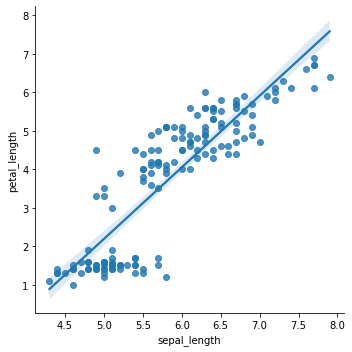

In [35]:
sns.lmplot(data=df,x = "sepal_length" ,y = "petal_length")

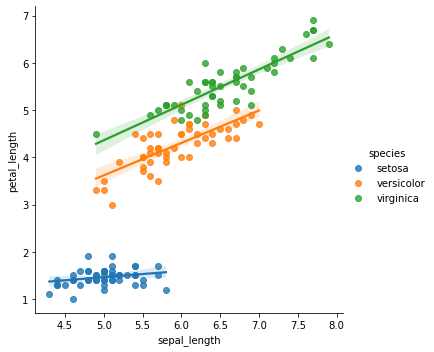

In [43]:
sns.lmplot(data=df,x = "sepal_length" ,y = "petal_length", hue = "species")

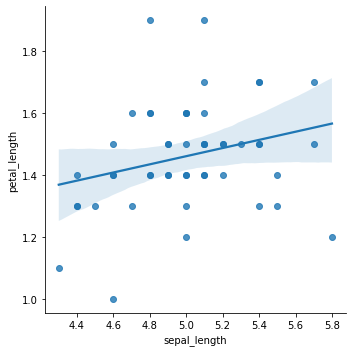

In [49]:
sns.lmplot(data=df[df.species == "setosa"],x = "sepal_length" ,y = "petal_length")

3. Ajusta un modelo de regresión (múltiple o simple) para cada una de las especies. Cuál funciona mejor?!
Te atreves a hacerlo con un bucle?

In [33]:
for cat in df.species.unique():
    Y = df.loc[df.species == cat,"petal_length"]
    X = df.loc[df.species == cat,["petal_width", "sepal_length", "sepal_width"]]

    regr = linear_model.LinearRegression()
    regr.fit(X, Y) 
    Y_pred = regr.predict(X) 
    
    print(cat)
    print("Pendiente: ",regr.coef_) #Cuanto se incrementa Y, por cada incremento de X, MANTENIENDO LAS DEMÁS VARIABLES CONSTANTES
    print("Intercept", regr.intercept_) 
    print("R cuadrado: ",r2_score(Y, Y_pred)) 

setosa
Pendiente:  [ 0.46252684  0.11605588 -0.02865363]
Intercept 0.8654673105153724
R cuadrado:  0.1449035077983194
versicolor
Pendiente:  [ 1.36020786  0.43586233 -0.10684954]
Intercept 0.1650588271593838
R cuadrado:  0.7713236695198291
virginica
Pendiente:  [ 0.21564651  0.74297175 -0.08225447]
Intercept 0.46502707309879465
R cuadrado:  0.7550969696635083


(EXTRA) 3.1 Convierte este código a función para usarlo con cualquier dataframe

4. El modelo de regresión lineal está fuertemente relacionado con la correlación entre columnas. Crea una matriz de correlaciones que muestre qué columnas tienen más relación entre ellas

# Validación interna y externa de los modelos

#### Diferencia principal
- Con la validación interna *hacemos trampas*, ya que evaluamos el modelo con los mismos datos con el que lo hemos entrenado.
- Con la validación externa, usamos unos datos para entrenar el modelo, y otros distintos para evaluarlo. Es mucho mejor, ya que el modelo "no conoce" los datos con los que va a ser evaluado

In [113]:
from sklearn.model_selection import train_test_split

df = pd.read_csv(os.getcwd() + "\\data\\2008.csv")
df = df.dropna(subset = ["ArrDelay"])
df = df.sample(frac=1).head(100000)

In [114]:
X = df[['AirTime','Distance','TaxiIn','TaxiOut']]  # Añadirle el DepDelay es hacer un poco de trampa, ya que hay mucha correlación...
# dummies = pd.get_dummies(data=df[['Month', 'DayofMonth', 'DayOfWeek']])
# X = dummies.add(X,fill_value=0)

Y = df['ArrDelay']

Creación del conjunto training y el conjunto test

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=1)

Evaluación interna

In [116]:
modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
prediccionesINTERNA = modelo.predict(X_train)
print("R2: ",r2_score(y_train, prediccionesINTERNA))

R2:  0.1357064293009702


Evaluación externa

In [117]:
prediccionesEXTERNA = modelo.predict(X_test)
print("R2: ",r2_score(y_test, prediccionesEXTERNA))

R2:  0.12666017497134419


PASO FINAL

In [118]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

### Enriquecer los modelos

Juntamos algunas de las nuevas variables que hemos aprendido a generar

In [147]:
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

# Columnas básicas
df = pd.read_csv(os.getcwd() + "\\data\\2008_small.csv",nrows = 5e5)
df = df.dropna(subset = ["ArrDelay"])
df = df[df.AirTime > 0]

df = df.sample(frac=1)

X = df[['AirTime','Distance','TaxiIn','TaxiOut']]

X.head()

,AirTime,Distance,TaxiIn,TaxiOut
68346,15.000,72,5.000,9.000
471389,107.000,756,17.000,11.000
334728,58.000,406,5.000,20.000
286829,108.000,928,4.000,10.000
446980,40.000,152,4.000,8.000


In [148]:
# Cálculo de polinomios

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X = pd.DataFrame(X_poly, columns = poly.get_feature_names(input_features=X.columns))

X.head()

,1,AirTime,Distance,TaxiIn,TaxiOut,AirTime^2,AirTime Distance,AirTime TaxiIn,AirTime TaxiOut,Distance^2,Distance TaxiIn,Distance TaxiOut,TaxiIn^2,TaxiIn TaxiOut,TaxiOut^2
0,1.000,15.000,72.000,5.000,9.000,225.000,1080.000,75.000,135.000,5184.000,360.000,648.000,25.000,45.000,81.000
1,1.000,107.000,756.000,17.000,11.000,11449.000,80892.000,1819.000,1177.000,571536.000,12852.000,8316.000,289.000,187.000,121.000
2,1.000,58.000,406.000,5.000,20.000,3364.000,23548.000,290.000,1160.000,164836.000,2030.000,8120.000,25.000,100.000,400.000
3,1.000,108.000,928.000,4.000,10.000,11664.000,100224.000,432.000,1080.000,861184.000,3712.000,9280.000,16.000,40.000,100.000
4,1.000,40.000,152.000,4.000,8.000,1600.000,6080.000,160.000,320.000,23104.000,608.000,1216.000,16.000,32.000,64.000


In [149]:
# Generar Columnas de interés

X["VelocidadMedia"] = X["Distance"] / X["AirTime"] * 60
X["logAirTime"] = np.log(X["AirTime"])
df["Weekends"] = False
df["Weekends"][df.DayOfWeek.isin([6,7])] = True
# df["Ruta"] = df["Origin"] + "-" + df["Dest"]

X.head()

,1,AirTime,Distance,TaxiIn,TaxiOut,AirTime^2,AirTime Distance,AirTime TaxiIn,AirTime TaxiOut,Distance^2,Distance TaxiIn,Distance TaxiOut,TaxiIn^2,TaxiIn TaxiOut,TaxiOut^2,VelocidadMedia,logAirTime
0,1.000,15.000,72.000,5.000,9.000,225.000,1080.000,75.000,135.000,5184.000,360.000,648.000,25.000,45.000,81.000,288.000,2.708
1,1.000,107.000,756.000,17.000,11.000,11449.000,80892.000,1819.000,1177.000,571536.000,12852.000,8316.000,289.000,187.000,121.000,423.925,4.673
2,1.000,58.000,406.000,5.000,20.000,3364.000,23548.000,290.000,1160.000,164836.000,2030.000,8120.000,25.000,100.000,400.000,420.000,4.060
3,1.000,108.000,928.000,4.000,10.000,11664.000,100224.000,432.000,1080.000,861184.000,3712.000,9280.000,16.000,40.000,100.000,515.556,4.682
4,1.000,40.000,152.000,4.000,8.000,1600.000,6080.000,160.000,320.000,23104.000,608.000,1216.000,16.000,32.000,64.000,228.000,3.689


In [150]:
# Añadir columnas dummies

X["Month"] = df["Month"].apply(str).reset_index(drop = True)
X["DayofMonth"] = df["DayofMonth"].apply(str).reset_index(drop = True)
X["DayOfWeek"] = df["DayOfWeek"].apply(str).reset_index(drop = True)
X["Origin"] = df["Origin"]
X["Dest"] = df["Dest"]
X["UniqueCarrier"] = df['UniqueCarrier']
# X["Ruta"] = df["Ruta"]

dummies = pd.get_dummies(data=X[['Month', 'DayofMonth', 'DayOfWeek',"Origin","Dest",'UniqueCarrier']])


X = X.drop(columns = ['Month','DayOfWeek',"DayofMonth","Origin","1","Dest",'UniqueCarrier']) # No podemos mantener columnas tipo string

X.head()

,AirTime,Distance,TaxiIn,TaxiOut,AirTime^2,AirTime Distance,AirTime TaxiIn,AirTime TaxiOut,Distance^2,Distance TaxiIn,Distance TaxiOut,TaxiIn^2,TaxiIn TaxiOut,TaxiOut^2,VelocidadMedia,logAirTime
0,15.000,72.000,5.000,9.000,225.000,1080.000,75.000,135.000,5184.000,360.000,648.000,25.000,45.000,81.000,288.000,2.708
1,107.000,756.000,17.000,11.000,11449.000,80892.000,1819.000,1177.000,571536.000,12852.000,8316.000,289.000,187.000,121.000,423.925,4.673
2,58.000,406.000,5.000,20.000,3364.000,23548.000,290.000,1160.000,164836.000,2030.000,8120.000,25.000,100.000,400.000,420.000,4.060
3,108.000,928.000,4.000,10.000,11664.000,100224.000,432.000,1080.000,861184.000,3712.000,9280.000,16.000,40.000,100.000,515.556,4.682
4,40.000,152.000,4.000,8.000,1600.000,6080.000,160.000,320.000,23104.000,608.000,1216.000,16.000,32.000,64.000,228.000,3.689


A veces volver a juntar dataframes puede dar algunos problemas, así que podemos solucionarlo con

In [151]:
for col in dummies.columns:
    X[col] = dummies[col]

In [152]:
X.head()

,AirTime,Distance,TaxiIn,TaxiOut,AirTime^2,AirTime Distance,AirTime TaxiIn,AirTime TaxiOut,Distance^2,Distance TaxiIn,...,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
0,15.000,72.000,5.000,9.000,225.000,1080.000,75.000,135.000,5184.000,360.000,...,0,1,0,0,0,0,0,0,0,0
1,107.000,756.000,17.000,11.000,11449.000,80892.000,1819.000,1177.000,571536.000,12852.000,...,0,0,0,0,0,0,0,1,0,0
2,58.000,406.000,5.000,20.000,3364.000,23548.000,290.000,1160.000,164836.000,2030.000,...,0,0,0,0,0,0,0,0,0,0
3,108.000,928.000,4.000,10.000,11664.000,100224.000,432.000,1080.000,861184.000,3712.000,...,0,0,0,0,0,1,0,0,0,0
4,40.000,152.000,4.000,8.000,1600.000,6080.000,160.000,320.000,23104.000,608.000,...,0,0,0,0,1,0,0,0,0,0


#### Ajuste Final del modelo

Ajustamos el modelo de regresión ampliado

In [170]:
Y = df['ArrDelay']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=2)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

prediccionesINTERNA = regr.predict(X_train)
print("R2 INTERNA: ",r2_score(y_train, prediccionesINTERNA))

prediccionesEXTERNA = regr.predict(X_test)
print("R2 EXTERNA: ",r2_score(y_test, prediccionesEXTERNA))

R2 INTERNA:  0.15582438614468364
R2 EXTERNA:  0.15586689739012416


### Ejercicio final

Intenta aplicar algunos de los apartados que hemos visto en este ejemplo sobre los datos iris (o otro dataset de tu elección). Es especialmente importante la parte de validación interna y externa.

Puedes añadir alguna variable adicional, o algún tipo de preprocesamiento al modelo

In [36]:
import seaborn as sns
df = sns.load_dataset("iris")

Y = df["petal_length"]
X = df[["sepal_length","petal_width","sepal_width"]]

In [37]:
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled,columns =X.columns)
maxfeature = X_scaled[["sepal_length","petal_width","sepal_width"]].idxmax(axis=1)
df["MaxFeature"] = maxfeature

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X = pd.DataFrame(X_poly, columns = poly.get_feature_names(input_features=X.columns))

dummies = pd.get_dummies(df[["species","MaxFeature"]])
X = pd.concat([X, dummies],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=2)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

prediccionesINTERNA = regr.predict(X_train)
print("R2 INTERNA: ",r2_score(y_train, prediccionesINTERNA))

prediccionesEXTERNA = regr.predict(X_test)
print("R2 EXTERNA: ",r2_score(y_test, prediccionesEXTERNA))

R2 INTERNA:  0.9803296047549767
R2 EXTERNA:  0.9896373087137519


Representa gráficamente los resultados

¡Explora algunas opciones adicionales!

https://seaborn.pydata.org/tutorial/regression.html

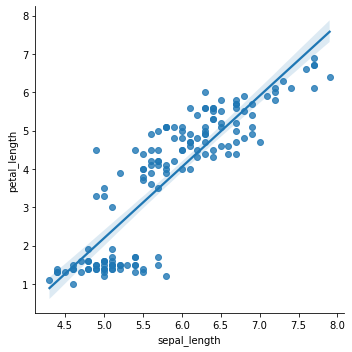

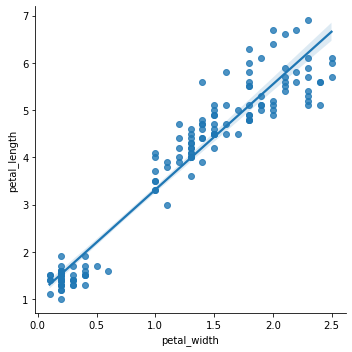

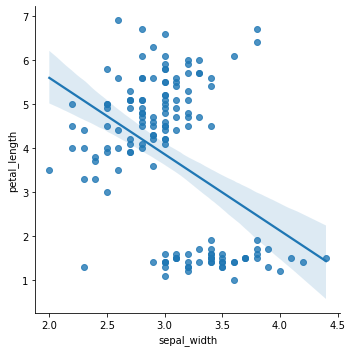

In [45]:
for col in ["sepal_length","petal_width","sepal_width"]:
    sns.lmplot(data = df, x =col, y = "petal_length")

© Netmind S.L.

Todos los derechos reservados. Este documento (v1.00) ha sido diseñado para el uso exclusivo del cliente que atiende a esta formación.

Ninguna parte de este documento puede ser reproducida, distribuida o transmitida en cualquier forma o por cualquier medio sin el permiso previo por escrito de Netmind.